In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Classification : Emission du SOx

In [2]:
# Load the data
df3 = pd.read_csv('../Data/data_toulouse/merged_emission.csv')
df3["type_avion"] = df3['type_avion'].apply(str.upper)

In [3]:
df3['emission_sox'][0]

0.6406473726957348

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


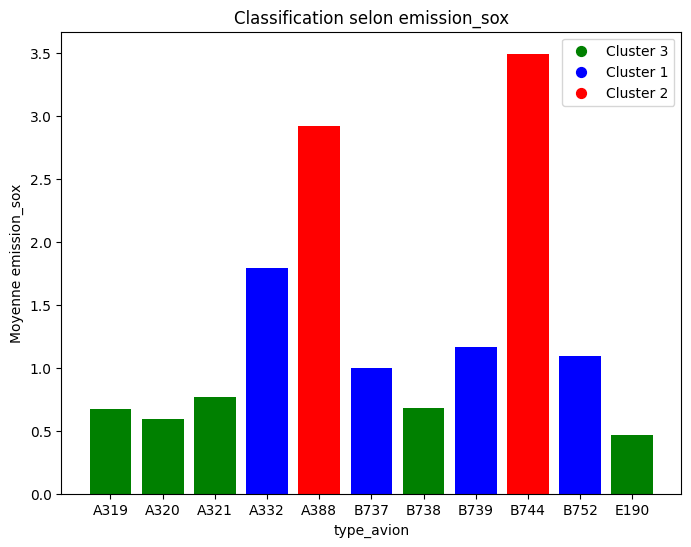

In [4]:
ind = 'emission_sox'
facteur = 'type_avion'

grouped_data = df3.groupby(facteur)[ind].mean().reset_index()

# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data[[ind]])
labels = kmeans.labels_

colors = ['g', 'b', 'r']
# Assign each label to a color based on its rank (i.e., the label with the highest mean value gets the first color, etc.)
mean_values = grouped_data.groupby(labels)[ind].mean().sort_values()
color_map = {label: colors[i] for i, label in enumerate(mean_values.index)}

# Plot the results with bar color based on the cluster label
fig, ax = plt.subplots(figsize=(8, 6))
for i, label in enumerate(labels):
    color = color_map[label]
    ax.bar(grouped_data[facteur][i], grouped_data[ind][i], color=color)
legend_handles = [plt.scatter([], [], marker='o', s=50, c=color, label=f'Cluster {label+1}') 
                    for label, color in color_map.items()]
ax.legend(handles=legend_handles)
ax.set_xlabel(facteur)
ax.set_ylabel('Moyenne '+ind)
ax.set_title('Classification selon '+ind)
plt.show()

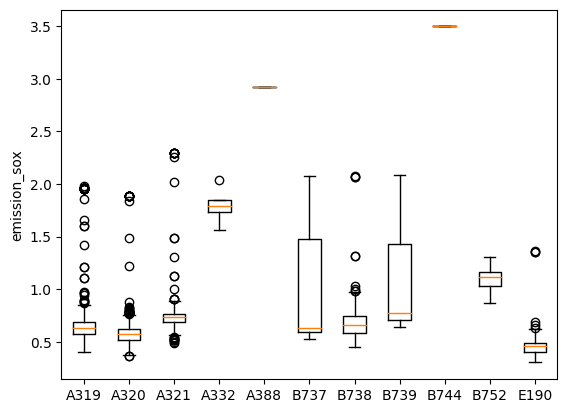

In [5]:
grouped_data = df3.groupby('type_avion')
col = df3.columns[4]
fig, ax = plt.subplots()
ax.boxplot([grouped_data.get_group(name)[col] for name in grouped_data.groups.keys()])
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_ylabel(col)
plt.show()